In [1]:
import tensorflow as tf
import shutil
import numpy as np
import pandas as pd
import cv2
import os
import time
import matplotlib.pyplot as plt
import glob

import efficientnet.tfkeras as enet
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
tf.compat.v1.enable_eager_execution()

''' Seed for reproducible results '''
# Seed value
# Apparently you may use different seed values at each stage
seed_value = 0
# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os

os.environ['PYTHONHASHSEED'] = str(seed_value)
# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random

random.seed(seed_value)
# 3. Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)
# 4. Set the `tensorflow` pseudo-random generator at a fixed value

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\asus\appdata\

In [2]:
''' Read labels '''
all_files = glob.glob("cropped_data/*.jpg")
# all_files = np.random.choice(all_files, int(len(all_files) * 0.6), replace=False)
# all_files = all_files[:int(len(all_files) * 0.9)]

# #1
# all_files = all_files[:int(len(all_files) * 0.3)]

# #2 
# all_files = all_files[int(len(all_files) * 0.2):int(len(all_files) * 0.5)]

#3
all_files = all_files[int(len(all_files) * 0.5):int(len(all_files) * 0.8)]


# #4
# all_files = all_files[int(len(all_files) * 0.7):]

print(len(all_files))



4373


In [3]:
labels = np.zeros(len(all_files), dtype=np.float)
for i in range(len(all_files)):
    file = all_files[i].split('\\')[1]
    file = file.split('.')[0]
    labels[i] = int(file.split('_')[1])
print(labels)
print(labels.shape)

''' Read images '''
dataset = np.array([cv2.imread(i, cv2.IMREAD_GRAYSCALE) for i in all_files], dtype=np.float)
print(dataset.shape)


[1. 0. 0. ... 0. 1. 1.]
(4373,)
(4373, 120, 120)


In [4]:
print('Normalization')
dataset = dataset.astype('float32')
print(np.max(dataset))
print(np.min(dataset))
dataset /= np.float(255)
# dataset -= 0.5
# dataset *= 2
print(np.max(dataset))
print(np.min(dataset))

Normalization
255.0
0.0
1.0
0.0


In [5]:
dataset = np.stack((dataset,) * 3, axis=-1)
print(dataset.shape)

(4373, 120, 120, 3)


In [6]:
x_test_1 = dataset
y_test1 = labels

In [7]:

''' Categorical labels '''
from tensorflow.keras.utils import to_categorical

# y_train1 = to_categorical(y_train1, num_classes=len(np.unique(labels)))
# y_test1 = to_categorical(y_test1, num_classes=len(np.unique(labels)))

In [8]:
def buil_model_function(model_name):
    if model_name == 'enet':
        model = enet.EfficientNetB3(include_top=False, pooling='avg', input_shape=(120, 120, 3))
        x = model.output
        x = tf.keras.layers.Dense(256, activation="relu")(x)
        x = tf.keras.layers.Dense(128, activation="relu")(x)

        # output layer
        predictions = tf.keras.layers.Dense(2, activation="softmax")(x)
        model_final = tf.keras.models.Model(inputs=model.input, outputs=predictions)
#         enetb3_cropped_bahman_4
        model_final.load_weights('enetb3_cropped_bahman_3.h5')
        return model_final
    
    elif model_name == 'Xception':
        model = tf.keras.applications.Xception(include_top=False, 
                                          pooling='avg', 
                                          input_shape=(120, 120, 3), 
                                          weights='imagenet')
        x = model.output
        x = tf.keras.layers.Dense(256, activation="relu")(x)
        x = tf.keras.layers.Dense(128, activation="relu")(x)

        # output layer
        predictions = tf.keras.layers.Dense(2, activation="softmax")(x)
        model_final = tf.keras.models.Model(inputs=model.input, outputs=predictions)
        
        model_final.load_weights('Xception_cropped_bahman_3.h5')
        return model_final
    
    elif model_name == 'MobileNetV2':
        model = tf.keras.applications.MobileNetV2(include_top=False, 
                                          pooling='avg', 
                                          input_shape=(120, 120, 3), 
                                          weights='imagenet')
        x = model.output
        x = tf.keras.layers.Dense(256, activation="relu")(x)
        x = tf.keras.layers.Dense(128, activation="relu")(x)

        # output layer
        predictions = tf.keras.layers.Dense(2, activation="softmax")(x)
        model_final = tf.keras.models.Model(inputs=model.input, outputs=predictions)
        
        model_final.load_weights('MobileNetV2_cropped_bahman_3.h5')
        return model_final
    
    elif model_name == 'InceptionV3':
        model = tf.keras.applications.InceptionV3(include_top=False, 
                                          pooling='avg', 
                                          input_shape=(120, 120, 3), 
                                          weights='imagenet')
        x = model.output
        x = tf.keras.layers.Dense(256, activation="relu")(x)
        x = tf.keras.layers.Dense(128, activation="relu")(x)

        # output layer
        predictions = tf.keras.layers.Dense(2, activation="softmax")(x)
        model_final = tf.keras.models.Model(inputs=model.input, outputs=predictions)
        
        model_final.load_weights('InceptionV3_cropped_bahman_3.h5')
        return model_final
    
    elif model_name == 'ResNet50':
        model = tf.keras.applications.ResNet50(include_top=False, 
                                          pooling='avg', 
                                          input_shape=(120, 120, 3), 
                                          weights='imagenet')
        x = model.output
        x = tf.keras.layers.Dense(256, activation="relu")(x)
        x = tf.keras.layers.Dense(128, activation="relu")(x)

        # output layer
        predictions = tf.keras.layers.Dense(2, activation="softmax")(x)
        model_final = tf.keras.models.Model(inputs=model.input, outputs=predictions)
        
        model_final.load_weights('ResNet50_cropped_bahman_3.h5')
        return model_final
    else:
        return 'Invalid model name'

model_final1 = buil_model_function('enet')
model_final2 = buil_model_function('Xception')
model_final3 = buil_model_function('MobileNetV2')
model_final4 = buil_model_function('InceptionV3')
model_final5 = buil_model_function('ResNet50')
# model_final.summary()

Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`


c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [9]:
models = [model_final1, model_final2, model_final3, model_final4, model_final5]

In [10]:
preds = [model.predict(x_test_1) for model in models]

In [11]:
preds = np.array(preds)

In [12]:
print(preds.shape)
y_test1 = np.array(y_test1).astype('float32')

(5, 4373, 2)


In [13]:
from sklearn.metrics import accuracy_score
# prediction1 = model_final1.predict_classes(x_test_1)
# prediction2 = model_final2.predict_classes(x_test_1)
# prediction3 = model_final3.predict_classes(x_test_1)
# prediction4 = model_final4.predict_classes(x_test_1)
# prediction5 = model_final5.predict_classes(x_test_1)
all_predictions = np.argmax(preds, axis=2)
accuracy1 = accuracy_score(y_test1, all_predictions[0])
accuracy2 = accuracy_score(y_test1, all_predictions[1])
accuracy3 = accuracy_score(y_test1, all_predictions[2])
accuracy4 = accuracy_score(y_test1, all_predictions[3])
accuracy5 = accuracy_score(y_test1, all_predictions[4])
print(preds.shape)
# print(np.argmax(preds, axis=2).shape)

(5, 4373, 2)


In [14]:
from sklearn.metrics import accuracy_score

def weighted_classes(preds, ideal_weights):
    ideal_weights_preds = np.tensordot(preds, ideal_weights, axes= ((0), (0)))
    ideal_weights_ensemble_predictions = np.argmax(ideal_weights_preds, axis = 1)
    return ideal_weights_ensemble_predictions
ideal_weights = [0.2, 0.2, 0.2, 0.2, 0.2]
# ideal_weights_preds = np.tensordot(preds, ideal_weights, axes= ((0), (0)))
# ideal_weights_ensemble_predictions = np.argmax(ideal_weights_preds, axis = 1)
ideal_weights_ensemble_predictions = weighted_classes(preds, ideal_weights)
print(ideal_weights_ensemble_predictions)
print(y_test1)
ideal_weighted_accuracy = accuracy_score(y_test1, ideal_weights_ensemble_predictions)



[1 0 0 ... 0 1 1]
[1. 0. 0. ... 0. 1. 1.]


In [15]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for model4 = ', accuracy4)
print('Accuracy Score for model5 = ', accuracy5)
print('Accuracy Score for average ensemble = ', ideal_weighted_accuracy)

Accuracy Score for model1 =  0.9368854333409559
Accuracy Score for model2 =  0.9217928195746627
Accuracy Score for model3 =  0.9238509032700664
Accuracy Score for model4 =  0.9071575577406814
Accuracy Score for model5 =  0.9124171049622685
Accuracy Score for average ensemble =  0.952206723073405


0.9368854333409559 [[1998  166]
 [ 110 2099]] 0.9267108167770419 0.9502037120869171 0.9383102369244524 0.9454103233942887
0.9217928195746627 [[2045  119]
 [ 223 1986]] 0.9434679334916865 0.8990493435943866 0.9207232267037551 0.9075952837949
0.9238509032700664 [[1954  210]
 [ 123 2086]] 0.9085365853658537 0.9443186962426438 0.9260821309655939 0.9369385555156308
0.9071575577406814 [[1968  196]
 [ 210 1999]] 0.9107061503416857 0.9049343594386601 0.9078110808356041 0.9060828574018673
0.9124171049622685 [[1954  210]
 [ 173 2036]] 0.9065004452359751 0.9216840199185151 0.9140291806958473 0.9186067496841726

My model:
0.5 0.952435399039561 [[2048  116]
 [  92 2117]] 0.948051948051948 0.9583521955636034 0.9531742458352094 0.9562742795193786
0.6 0.952435399039561 [[2048  116]
 [  92 2117]] 0.948051948051948 0.9583521955636034 0.9531742458352094 0.9562742795193786
0.7 0.9526640750057169 [[2049  115]
 [  92 2117]] 0.9484767025089605 0.9583521955636034 0.9533888763791939 0.9563606794362123
0.799999

6.199999999999998 0.9526640750057169 [[2054  110]
 [  97 2112]] 0.9504950495049505 0.9560887279311906 0.9532836831415029 0.9549647314161694
6.299999999999999 0.9526640750057169 [[2054  110]
 [  97 2112]] 0.9504950495049505 0.9560887279311906 0.9532836831415029 0.9549647314161694
6.399999999999999 0.9528927509718729 [[2055  109]
 [  97 2112]] 0.9509230076542098 0.9560887279311906 0.9534988713318284 0.9550510988514064
6.499999999999998 0.9528927509718729 [[2055  109]
 [  97 2112]] 0.9509230076542098 0.9560887279311906 0.9534988713318284 0.9550510988514064
6.599999999999999 0.9528927509718729 [[2055  109]
 [  97 2112]] 0.9509230076542098 0.9560887279311906 0.9534988713318284 0.9550510988514064
6.699999999999998 0.9528927509718729 [[2055  109]
 [  97 2112]] 0.9509230076542098 0.9560887279311906 0.9534988713318284 0.9550510988514064
6.799999999999999 0.9528927509718729 [[2055  109]
 [  97 2112]] 0.9509230076542098 0.9560887279311906 0.9534988713318284 0.9550510988514064
6.899999999999999 0.

12.099999999999998 0.9512920192087811 [[2054  110]
 [ 103 2106]] 0.9503610108303249 0.9533725667722952 0.951864406779661 0.9527687296416938
12.199999999999998 0.9510633432426252 [[2054  110]
 [ 104 2105]] 0.9503386004514672 0.9529198732458126 0.9516274864376131 0.9524024975115374
12.299999999999997 0.9510633432426252 [[2054  110]
 [ 104 2105]] 0.9503386004514672 0.9529198732458126 0.9516274864376131 0.9524024975115374
12.399999999999997 0.9508346672764693 [[2054  110]
 [ 105 2104]] 0.950316169828365 0.95246717971933 0.9513904589645037 0.9520361990950227
12.499999999999996 0.9510633432426252 [[2054  110]
 [ 104 2105]] 0.9503386004514672 0.9529198732458126 0.9516274864376131 0.9524024975115374
12.599999999999998 0.9512920192087811 [[2054  110]
 [ 103 2106]] 0.9503610108303249 0.9533725667722952 0.951864406779661 0.9527687296416938
12.699999999999998 0.9512920192087811 [[2054  110]
 [ 103 2106]] 0.9503610108303249 0.9533725667722952 0.951864406779661 0.9527687296416938
12.799999999999997 

18.099999999999994 0.9499199634118454 [[2050  114]
 [ 105 2104]] 0.9486023444544635 0.95246717971933 0.9505308335215722 0.9516916953139136
18.199999999999996 0.9499199634118454 [[2050  114]
 [ 105 2104]] 0.9486023444544635 0.95246717971933 0.9505308335215722 0.9516916953139136
18.299999999999997 0.9499199634118454 [[2050  114]
 [ 105 2104]] 0.9486023444544635 0.95246717971933 0.9505308335215722 0.9516916953139136
18.399999999999995 0.9499199634118454 [[2050  114]
 [ 105 2104]] 0.9486023444544635 0.95246717971933 0.9505308335215722 0.9516916953139136
18.499999999999996 0.9499199634118454 [[2050  114]
 [ 105 2104]] 0.9486023444544635 0.95246717971933 0.9505308335215722 0.9516916953139136
18.599999999999994 0.9499199634118454 [[2050  114]
 [ 105 2104]] 0.9486023444544635 0.95246717971933 0.9505308335215722 0.9516916953139136
18.699999999999996 0.9499199634118454 [[2050  114]
 [ 105 2104]] 0.9486023444544635 0.95246717971933 0.9505308335215722 0.9516916953139136
18.799999999999997 0.949919

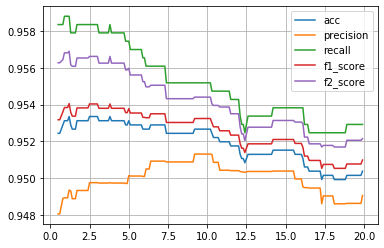

In [16]:
def results(y_test1, y_pred):
    acc = accuracy_score(y_test1, y_pred)
    cm = confusion_matrix(y_test1, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test1, y_pred).ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    f2_score = 5 * (precision * recall) / (4 * precision + recall)
    return acc, cm, precision, recall, f1_score, f2_score

acc_list = np.zeros(len(all_predictions))
precision_list = np.zeros(len(all_predictions))
recall_list = np.zeros(len(all_predictions))
f1_score_list = np.zeros(len(all_predictions))
f2_score_list = np.zeros(len(all_predictions))
for i in range(len(all_predictions)):
    acc, cm, precision, recall, f1_score, f2_score = results(y_test1, all_predictions[i])
    print(acc, cm, precision, recall, f1_score, f2_score)
    acc_list[i] = acc
    precision_list[i] = precision
    recall_list[i] = recall
    f1_score_list[i] = f1_score
    f2_score_list[i] = f2_score
    
print('\nMy model:')
# for step in range(0.5, 3, 0.1):
#     print(step)
acc_plot = []
precision_plot = []
recall_plot = []
f1_score_plot = []
f2_score_plot = []
steps = np.arange(0.5,20, 0.1)
for i in steps:
    ideal_weights = np.power(precision_list, i) / np.sum(np.power(precision_list, i))
    # print(ideal_weights)
    # ideal_weights = precision_list / np.sum(precision_list)
    # print(acc_list)
    # print(np.sum(acc_list))
    # print(np.sum(f1_score_list))
    # print(np.sum(np.power(acc_list, 2)))
    # print(np.sum(np.power(f1_score_list, 2)))
    # print(f1_score_list)
    # ideal_weights = [0.2, 0.2, 0.2, 0.2, 0.2]
    # ideal_weights = ideal_weights / np.sum(ideal_weights)
    # print(ideal_weights)
    
    ideal_weights_ensemble_predictions = weighted_classes(preds, ideal_weights)
    acc, cm, precision, recall, f1_score, f2_score = results(y_test1, ideal_weights_ensemble_predictions)
    acc_plot.append(acc)
    precision_plot.append(precision)
    recall_plot.append(recall)
    f1_score_plot.append(f1_score)
    f2_score_plot.append(f2_score)
#     print(i)
    print(i, acc, cm, precision, recall, f1_score, f2_score)
plt.plot(steps, acc_plot, label='acc')

plt.plot(steps, precision_plot, label='precision')
plt.plot(steps, recall_plot, label='recall')
plt.plot(steps, f1_score_plot, label='f1_score')
plt.plot(steps, f2_score_plot, label='f2_score')

plt.grid(True)
plt.legend()
plt.show()